In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set working directory
%cd /content/drive/MyDrive/FDA/

/content/drive/MyDrive/FDA


In [ ]:
# Include Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Read data
df_StreetNetwork = pd.read_csv('test data.csv')
df_StreetNetwork

,Region,City,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,Travel Connectivity,Cost of Living,Outdoors
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108,4.1120,7.222,6.4940
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241,7.0175,8.101,4.9435
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102,NaN,NaN,NaN
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174,3.6790,4.967,5.7960
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096,2.4885,8.471,7.2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369,2.8845,3.790,7.2095
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374,NaN,NaN,NaN
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217,4.3350,5.271,5.5940
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455,2.7710,5.259,7.4000


In [ ]:
# Missing Values
df_StreetNetwork.isna().sum()

Region                  0
City                    0
φ                       0
Η o                     0
Η w                     0
ĩ                       0
ς                       0
k̅                      0
P de                    0
P 4w                    0
Travel Connectivity    16
Cost  of Living        16
Outdoors               16
dtype: int64

**φ** is the orientation-order indicator
>
**Ηo** represents street orientation entropy
>
**Ηw** represents weighted street orientation entropy
>
**ĩ** represents median street segment length (meters)
>
**ς** represents average circuity
>
**k̅** represents average node degree
>
**Pde** represents the proportion of nodes that are dead-ends
>
**P4w** represents the proportion of nodes that are four-way intersections

In [ ]:
df_StreetNetworkCols = df_StreetNetwork[['φ','Η o','Η w','ĩ','ς','k̅','P de','P 4w']]
df_StreetNetworkCols

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w
0,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...
95,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


In [ ]:
df_StreetNetwork.shape

(100, 13)

####Provides summary statistics for all columns, including numeric and non-numeric (e.g., categorical) data types. For numerical columns, it includes count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. For categorical columns, it includes count, unique, top (most frequently occurring value), and frequency of the top value.

In [ ]:
# Variable summary
df_StreetNetwork.describe(include= "all")

,Region,City,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,Travel Connectivity,Cost of Living,Outdoors
count,100,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,84.000000,84.000000,84.000000
unique,5,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,US/Canada,Bangkok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.178790,3.351270,3.339230,82.990000,1.055980,2.923000,0.147580,0.228080,4.166619,6.000036,5.151560
std,NaN,NaN,0.224408,0.323212,0.337918,27.941044,0.027253,0.264333,0.080086,0.126133,2.114581,2.283019,1.385132
min,NaN,NaN,0.002000,2.083000,2.103000,23.200000,1.011000,2.348000,0.027000,0.061000,1.041000,0.000000,0.500000
25%,NaN,NaN,0.024000,3.244250,3.233500,64.550000,1.036750,2.710750,0.083750,0.138250,2.603500,4.541250,4.500000
50%,NaN,NaN,0.062000,3.514500,3.495500,80.650000,1.052500,2.947500,0.130500,0.191000,3.763750,5.633500,5.361750
75%,NaN,NaN,0.284750,3.557000,3.553250,97.125000,1.073000,3.107750,0.204250,0.309500,5.492500,7.949750,5.829500


## Min-Max Scaling:

Min-Max scaling transforms the data to a fixed range, usually between 0 and 1.
It subtracts the minimum value of the feature and then divides by the range (maximum - minimum).
This technique is sensitive to outliers because it uses the range of the data.
Min-Max scaling is useful when the data has a known minimum and maximum value, and you want to scale the data to a specific range.
It preserves the shape of the original distribution but compresses it into a smaller range.

In [ ]:
df_minmax_scaled = (df_StreetNetworkCols - df_StreetNetworkCols.min()) / (df_StreetNetworkCols.max() - df_StreetNetworkCols.min())
df_minmax_scaled

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515
2,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961
...,...,...,...,...,...,...,...,...
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058
96,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049


###K-Means

Provides K-means clustering to the data contained in the DataFrame df_minmax_scaled, using the first two columns, with the objective of forming 4 clusters. After fitting the model, it calculates and prints the SSE, providing a measure of how well the data is clustered by the algorithm.

In [ ]:
from sklearn.cluster import KMeans
mdl = KMeans(n_clusters=4, n_init='auto')
mdl.fit(df_minmax_scaled.iloc[:,0:2])
print('SSE Data: '+ str(mdl.inertia_))

SSE Data: 0.6483706907607144


In [ ]:
mdl.labels_

array([0, 3, 2, 2, 0, 2, 2, 2, 3, 2, 3, 2, 2, 0, 3, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 0, 3, 0, 2, 2, 1, 3, 3, 1, 1, 2, 3, 1, 3, 1, 1, 1, 0,
       0, 3, 3, 1, 2, 1, 3, 1, 3, 3, 1, 3], dtype=int32)

In [ ]:
df_minmax_scaled['predictedclass'] = mdl.labels_
df_minmax_scaled

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,predictedclass
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,3
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,0
2,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612,1
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417,1
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961,3
...,...,...,...,...,...,...,...,...,...
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058,2
96,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767,0
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913,0
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049,2


##Elbow Method

The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow.
>
After running this code, you'll have two lists: k containing the values of k (number of clusters) from 1 to 9, and wcss containing the corresponding Within-Cluster Sum of Squares (WCSS) values for each k.

In [ ]:
k = []
wcss = []
for i in range(1,10):
  mdl = KMeans(n_clusters=i, n_init=10)
  mdl.fit(df_minmax_scaled.iloc[:,0:2])
  k.append(i)
  wcss.append(mdl.inertia_)

<Axes: >

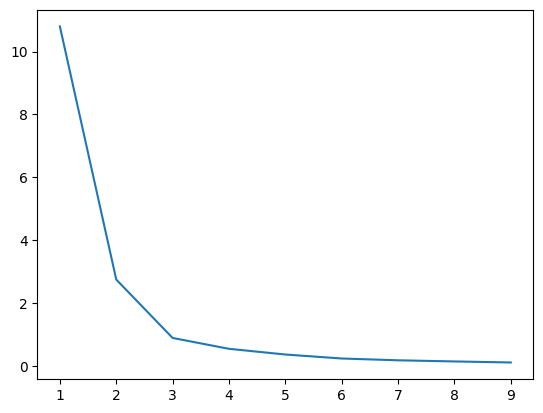

In [ ]:
sns.lineplot(x = k, y = wcss)

Performs K-means clustering on the specified dataset and visualizes the clusters and cluster centers in a scatter plot.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


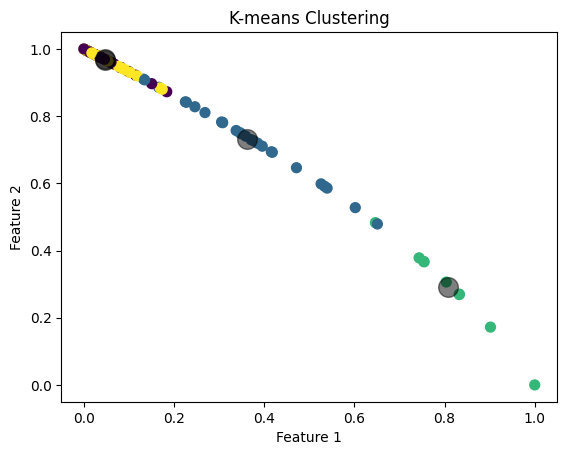

In [ ]:
X = np.array(df_minmax_scaled[['φ','Η o','Η w','ĩ','ς','k̅','P de','P 4w']])

# Specify the number of clusters
num_clusters = 4

# Create and fit the model
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# Predict the cluster for each data point
labels = kmeans.predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

##Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering algorithm commonly used for grouping similar objects into clusters based on their pairwise distances.
>
This code performs agglomerative hierarchical clustering with 4 clusters on the specified dataset and provides the cluster labels assigned to each data point.


In [ ]:
from sklearn.cluster import AgglomerativeClustering
mdl = AgglomerativeClustering(n_clusters=4)
mdl.fit(df_minmax_scaled.iloc[:,0:4])
mdl.labels_

array([2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 2, 3, 1, 0, 1, 1, 2, 1, 1, 0, 1, 3, 3, 0,
       2, 1, 0, 1, 2, 1, 0, 3, 0, 1, 3, 0])

##Hierarchical clustering - Dendogram


Hierarchical clustering is a popular method for grouping objects. It creates groups so that objects within a group are similar to each other and different from objects in other groups.
>
A dendrogram consists of many U-shaped lines that connect data points in a hierarchical tree. The height of each U represents the distance between the two data points being connected.
>

### Single Linkage:
Known as the nearest-neighbor method.
It computes the distance between the closest points of the clusters.
It tends to form long, elongated clusters.
### Complete Linkage:
Also known as the farthest-neighbor method.
It computes the distance between the farthest points of the clusters.
It tends to form compact, spherical clusters.
### Average Linkage:
Computes the average distance between all pairs of points in the two clusters.
It's less sensitive to outliers compared to single linkage.
It tends to produce more balanced dendrograms.
### Ward's Linkage:
Minimizes the variance when forming clusters.
It's a variance-minimizing approach that tends to produce clusters of similar size.
It is computationally intensive but often yields good results.

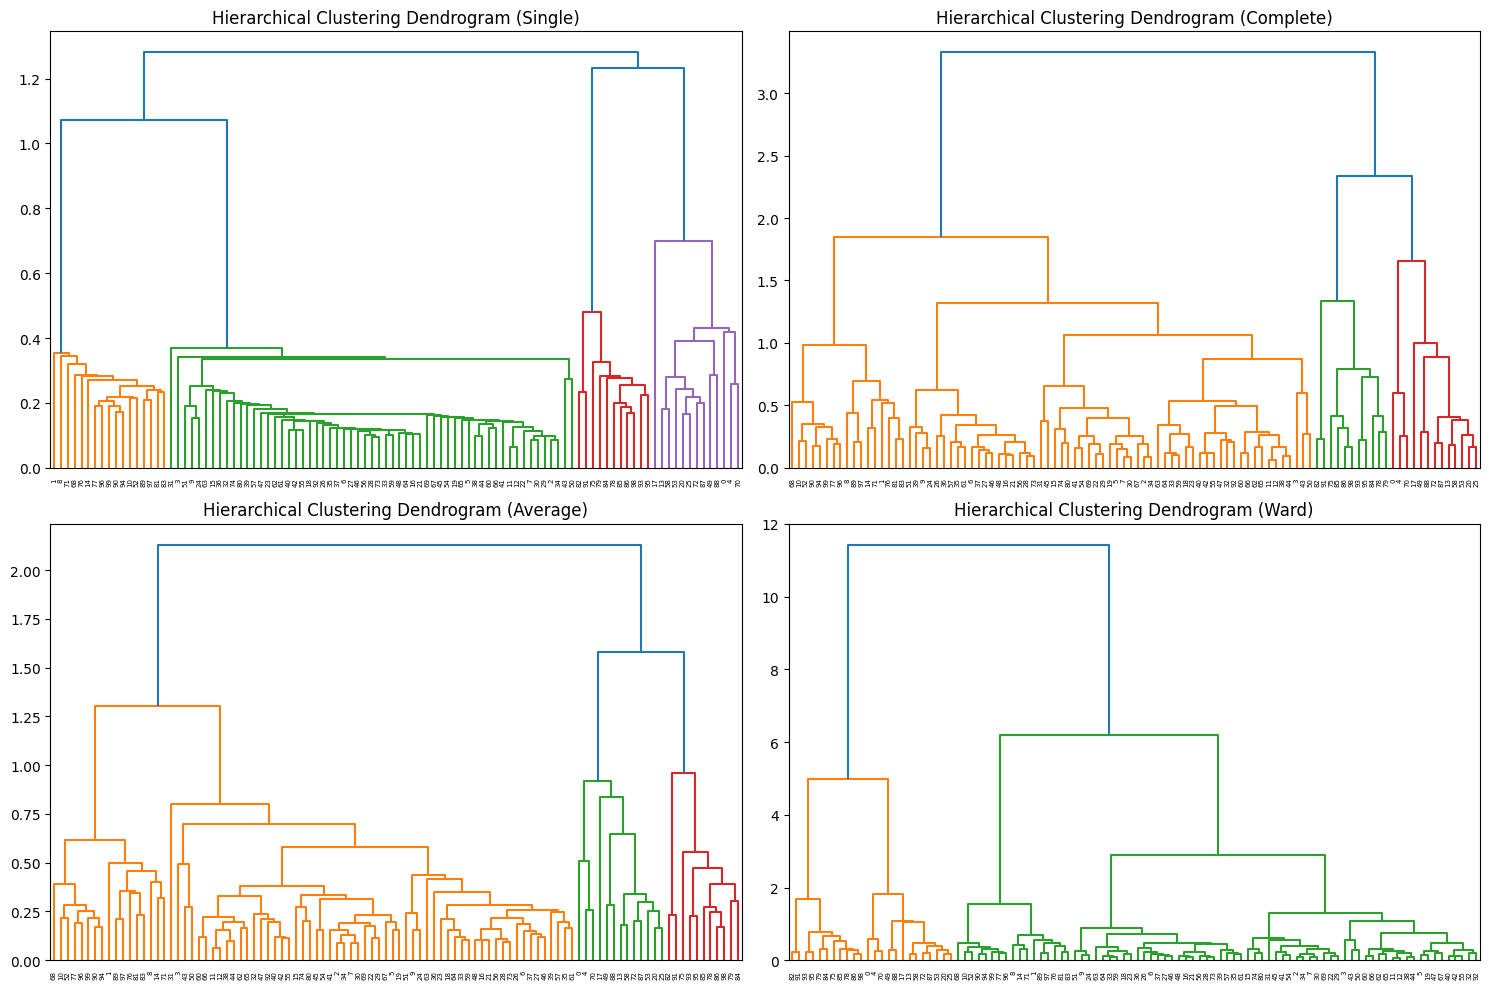

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_methods = ['single', 'complete', 'average','ward']

# Plotting dendrograms for different linkage methods
plt.figure(figsize=(15, 10))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(df_minmax_scaled, method=method, metric='euclidean')
    dendrogram(Z)
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()})')


plt.tight_layout()
plt.show()

This code provides a visual comparison of how hierarchical clustering dendrograms vary when different linkage methods are used. This visualization helps in understanding how clusters are formed based on the chosen linkage method and assists in selecting the most appropriate method for a particular dataset and clustering task.

## Pair-Plot
The pairplot is used for visualizing relationships between variables in a dataset. It shows scatterplots for each pair of variables along the diagonal, histograms for each individual variable on the diagonal, and scatterplots for variable pairs on the off-diagonal.

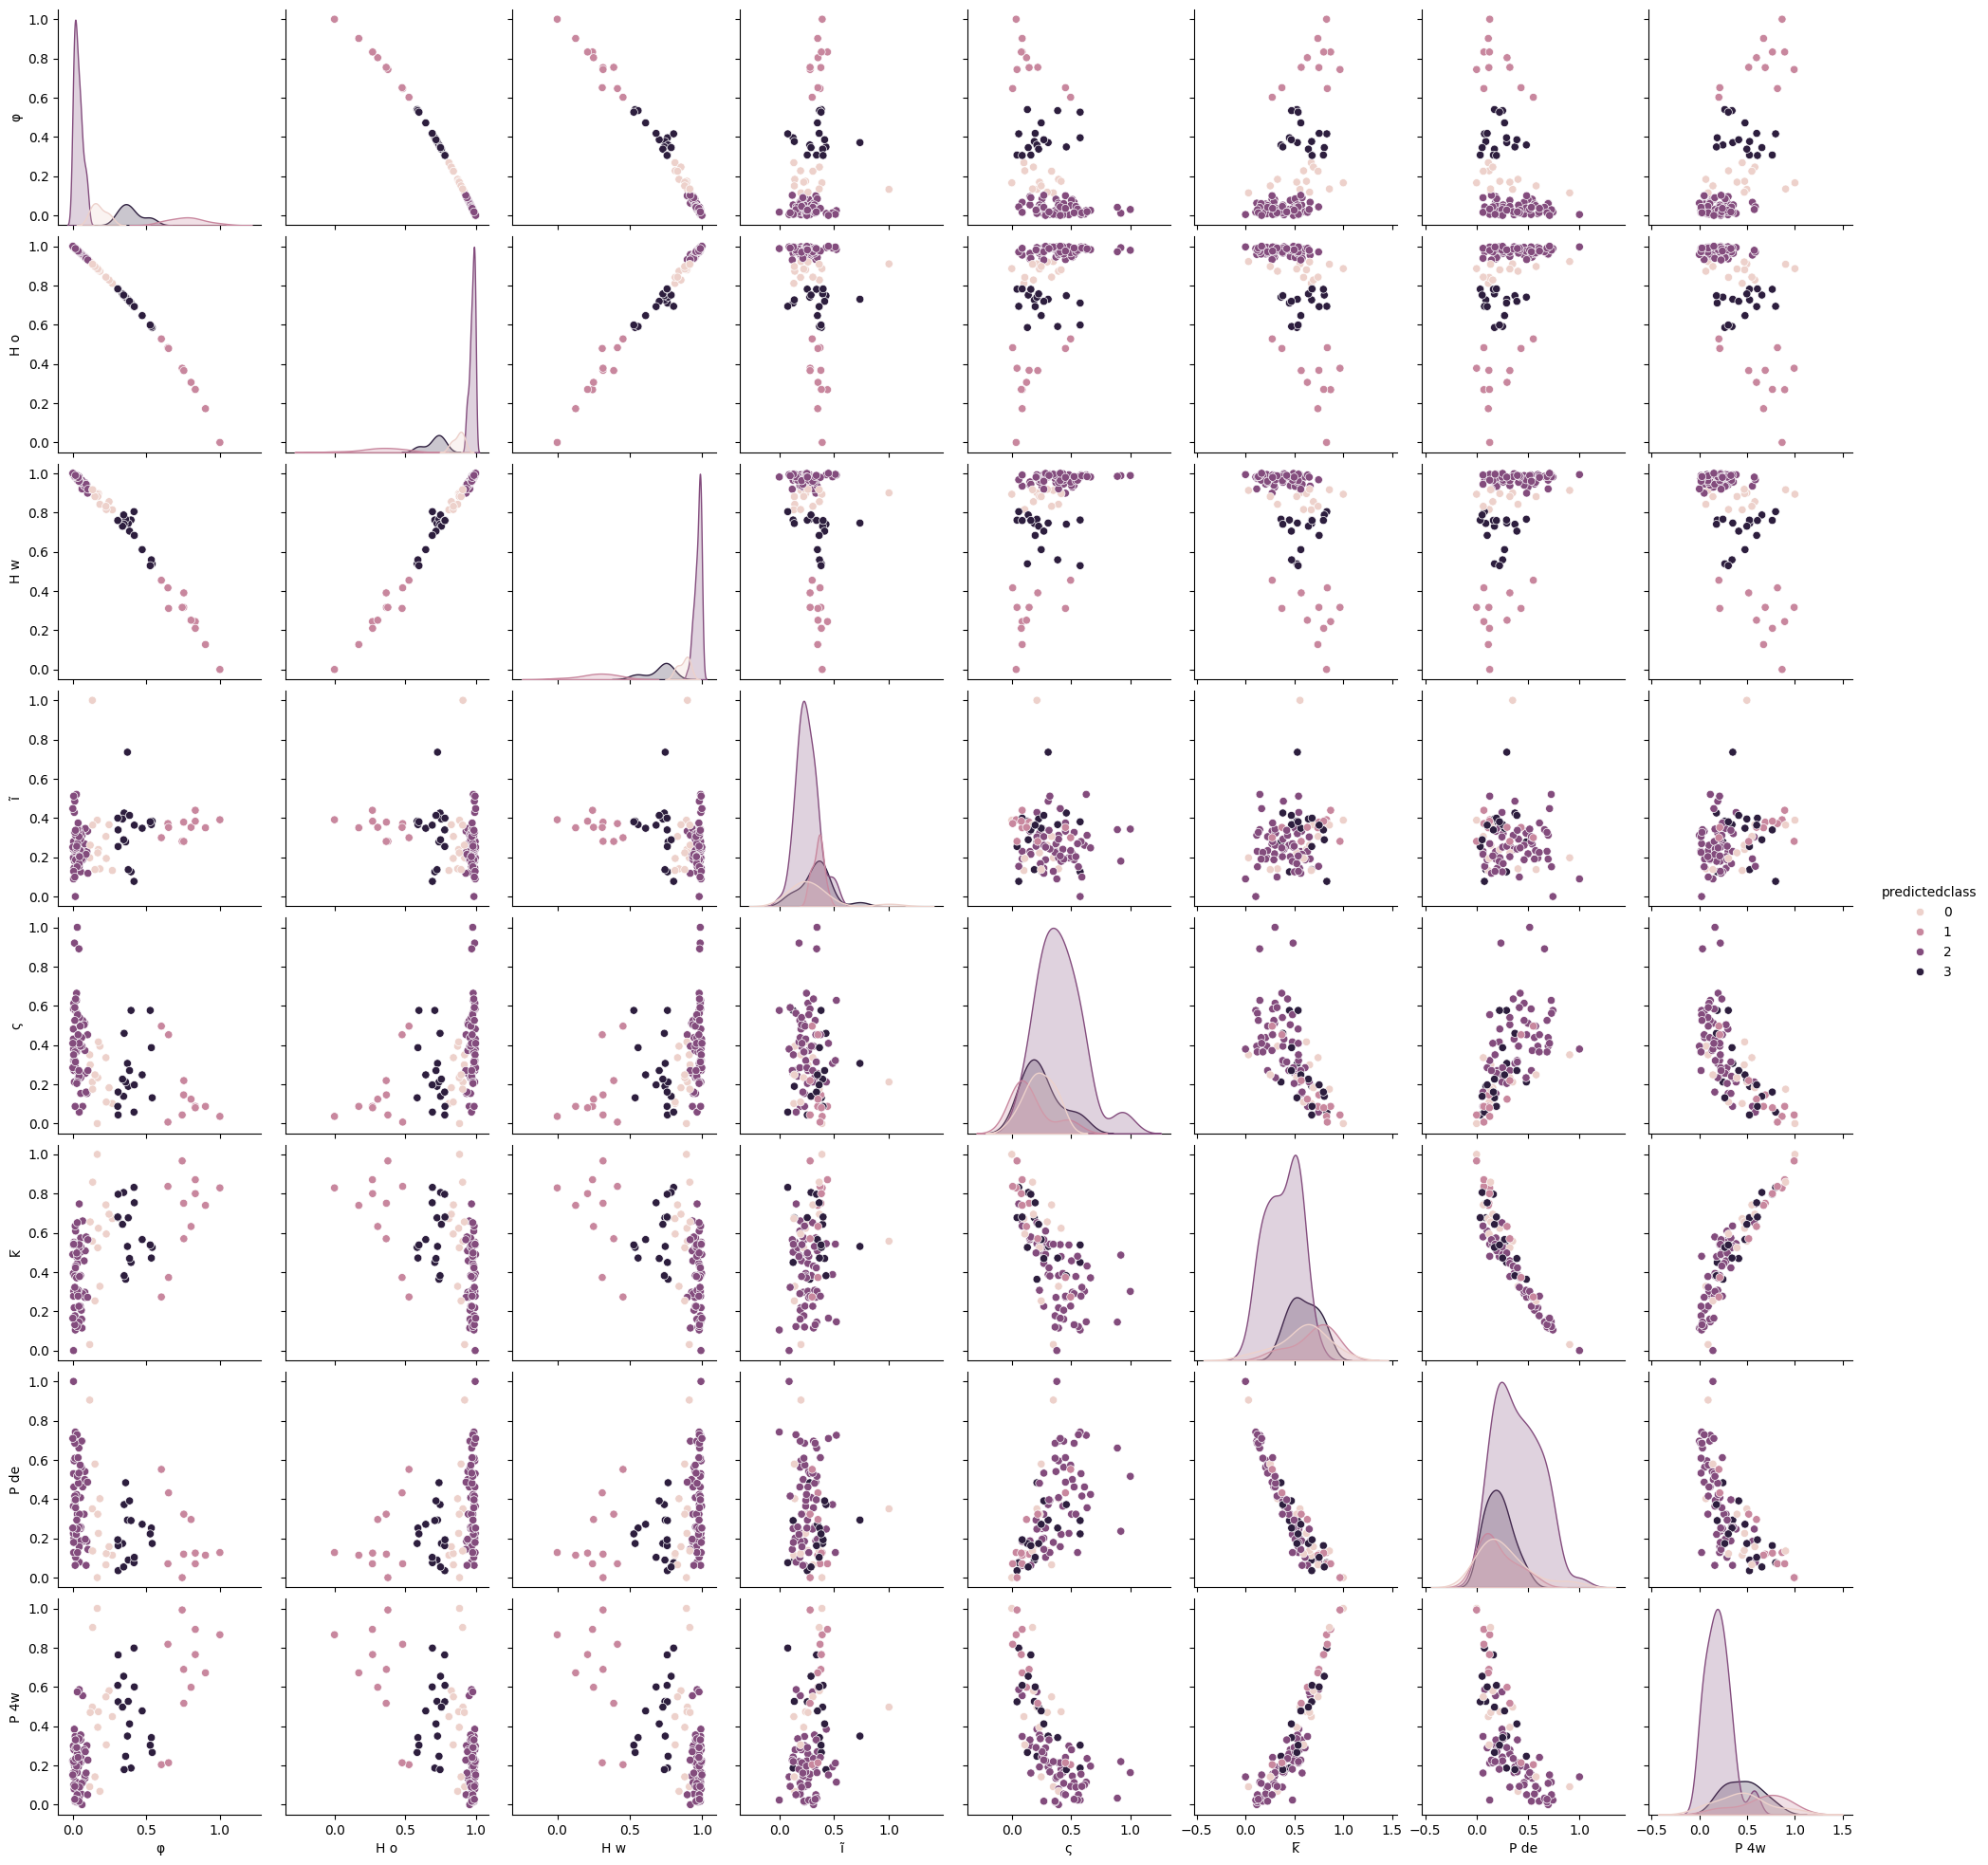

In [ ]:
sns.pairplot(df_minmax_scaled, hue='predictedclass')
plt.show()


Adding the remaining columns, also adding three new attributes such as Travel Connectivity, Cost of Living and Outdoors.


In [ ]:
add_columns = df_StreetNetwork[['Region','City', 'Travel Connectivity','Cost  of Living','Outdoors']]

# Add the extracted column to the second DataFrame
df_new_addedcols = pd.concat([df_minmax_scaled, add_columns],axis=1 )

# Display the second DataFrame after adding the column from the first DataFrame
display(df_new_addedcols)

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,predictedclass,Region,City,Travel Connectivity,Cost of Living,Outdoors
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,3,Asia/Oceania,Bangkok,4.1120,7.222,6.4940
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,0,Asia/Oceania,Beijing,7.0175,8.101,4.9435
2,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612,1,Asia/Oceania,Hanoi,NaN,NaN,NaN
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417,1,Asia/Oceania,Hong Kong,3.6790,4.967,5.7960
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961,3,Asia/Oceania,Jakarta,2.4885,8.471,7.2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058,2,US/Canada,Seattle,2.8845,3.790,7.2095
96,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767,0,US/Canada,St Louis,NaN,NaN,NaN
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913,0,US/Canada,Toronto,4.3350,5.271,5.5940
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049,2,US/Canada,Vancouver,2.7710,5.259,7.4000


In [ ]:
df_NewStreetNetwork = df_new_addedcols.dropna()
df_NewStreetNetwork

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,predictedclass,Region,City,Travel Connectivity,Cost of Living,Outdoors
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,3,Asia/Oceania,Bangkok,4.1120,7.222,6.4940
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,0,Asia/Oceania,Beijing,7.0175,8.101,4.9435
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417,1,Asia/Oceania,Hong Kong,3.6790,4.967,5.7960
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961,3,Asia/Oceania,Jakarta,2.4885,8.471,7.2020
7,0.057971,0.960640,0.945196,0.191134,0.437956,0.205833,0.562500,0.054369,1,Asia/Oceania,Kathmandu,1.0410,9.445,3.7980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.754738,0.366244,0.390392,0.280744,0.218978,0.570000,0.323370,0.516505,2,US/Canada,Portland,1.1020,0.000,4.9780
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058,2,US/Canada,Seattle,2.8845,3.790,7.2095
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913,0,US/Canada,Toronto,4.3350,5.271,5.5940
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049,2,US/Canada,Vancouver,2.7710,5.259,7.4000


Creating a new dataframe with all the columns containing numerical values.


In [ ]:
df_Numeric= df_NewStreetNetwork[['φ','Η o','Η w','ĩ','ς','k̅','P de','P 4w','predictedclass','Travel Connectivity','Cost  of Living','Outdoors']]
df_Numeric

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,predictedclass,Travel Connectivity,Cost of Living,Outdoors
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,3,4.1120,7.222,6.4940
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,0,7.0175,8.101,4.9435
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417,1,3.6790,4.967,5.7960
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961,3,2.4885,8.471,7.2020
7,0.057971,0.960640,0.945196,0.191134,0.437956,0.205833,0.562500,0.054369,1,1.0410,9.445,3.7980
...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.754738,0.366244,0.390392,0.280744,0.218978,0.570000,0.323370,0.516505,2,1.1020,0.000,4.9780
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058,2,2.8845,3.790,7.2095
97,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913,0,4.3350,5.271,5.5940
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049,2,2.7710,5.259,7.4000


####Heat Map
Ηo and Ηw are very strongly correlated
>
φ of 0 indicates a uniform distribution of streets in every direction and a φ of 1 indicates a single perfectly-ordered grid.
>


<Axes: >

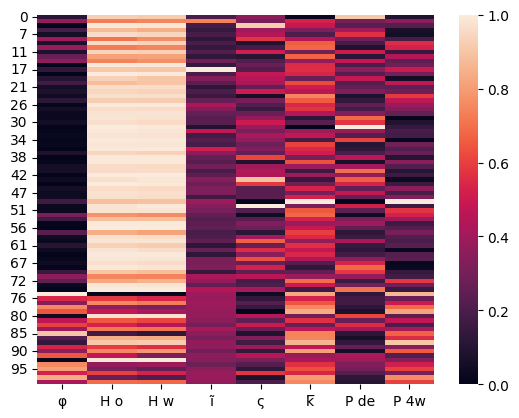

In [ ]:
sns.heatmap(df_Numeric[['φ','Η o','Η w','ĩ','ς','k̅','P de','P 4w']],vmin=0,vmax=1)

### Grouping the Predicted Class

In [ ]:
#Grouping by each predicted class
Predicted_class_group = df_NewStreetNetwork.groupby('predictedclass')
Predicted_class_group.first()

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,Region,City,Travel Connectivity,Cost of Living,Outdoors
predictedclass,,,,,,,,,,,,,
0,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,Asia/Oceania,Beijing,7.0175,8.101,4.9435
1,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417,Asia/Oceania,Hong Kong,3.6790,4.967,5.7960
2,1.000000,0.000000,0.000000,0.391325,0.036496,0.829167,0.127717,0.866019,US/Canada,Chicago,5.5075,4.766,5.4155
3,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,Asia/Oceania,Bangkok,4.1120,7.222,6.4940


In [ ]:
# Predicted Class 0
predicted_class_0 = Predicted_class_group.get_group(0)
predicted_class_0

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,predictedclass,Region,City,Travel Connectivity,Cost of Living,Outdoors
1,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,0,Asia/Oceania,Beijing,7.0175,8.101,4.9435
8,0.395764,0.710474,0.761840,0.125834,0.576642,0.449167,0.290761,0.186408,0,Asia/Oceania,Kyoto,6.7945,0.000,1.6465
10,0.376812,0.726484,0.744249,0.136797,0.189781,0.676667,0.089674,0.526214,0,Asia/Oceania,Melbourne,2.8465,4.798,6.2030
14,0.358974,0.740494,0.765900,0.278360,0.211679,0.363333,0.483696,0.246602,0,Asia/Oceania,Phnom Penh,1.2395,8.001,3.4330
52,0.307692,0.781187,0.761164,0.255005,0.043796,0.677500,0.035326,0.524272,0,Latin America,Lima,2.0120,8.496,5.3880
71,0.348941,0.747832,0.740189,0.425643,0.459854,0.381667,0.372283,0.178641,0,US/Canada,Atlanta,5.2915,5.241,5.0095
76,0.539576,0.585724,0.538566,0.383699,0.131387,0.525833,0.173913,0.266019,0,US/Canada,Cleveland,2.0775,5.595,4.6690
77,0.337793,0.757171,0.730041,0.395138,0.226277,0.643333,0.173913,0.497087,0,US/Canada,Dallas,4.7465,6.091,4.5020
81,0.471572,0.646431,0.610961,0.347950,0.248175,0.565833,0.271739,0.477670,0,US/Canada,Houston,4.3385,6.162,5.3860
83,0.385730,0.719146,0.705007,0.413251,0.270073,0.469167,0.391304,0.411650,0,US/Canada,Los Angeles,3.9585,4.556,6.7470


In [ ]:
# Predicted Class 1
predicted_class_1= Predicted_class_group.get_group(1)
predicted_class_1

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,predictedclass,Region,City,Travel Connectivity,Cost of Living,Outdoors
3,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417,1,Asia/Oceania,Hong Kong,3.6790,4.967,5.7960
7,0.057971,0.960640,0.945196,0.191134,0.437956,0.205833,0.562500,0.054369,1,Asia/Oceania,Kathmandu,1.0410,9.445,3.7980
9,0.066890,0.954636,0.934371,0.192088,0.087591,0.660833,0.184783,0.555340,1,Asia/Oceania,Manila,2.6345,8.752,4.8255
11,0.081382,0.944630,0.928958,0.217827,0.510949,0.297500,0.500000,0.145631,1,Asia/Oceania,Mumbai,5.4140,9.825,5.7920
16,0.007804,0.993996,0.994587,0.144423,0.270073,0.552500,0.201087,0.279612,1,Asia/Oceania,Seoul,6.1560,3.698,5.7760
18,0.003344,0.997332,0.992558,0.197807,0.481752,0.538333,0.225543,0.299029,1,Asia/Oceania,Singapore,2.9820,3.489,5.8340
19,0.100334,0.931955,0.898512,0.333174,0.452555,0.271667,0.486413,0.050485,1,Asia/Oceania,Sydney,3.2850,4.128,6.2635
21,0.053512,0.963976,0.964817,0.125834,0.255474,0.501667,0.250000,0.242718,1,Asia/Oceania,Tokyo,8.1515,3.431,6.5225
23,0.076923,0.947965,0.937077,0.203051,0.503650,0.457500,0.323370,0.279612,1,Europe,Amsterdam,8.3245,3.824,5.3070
24,0.043478,0.970647,0.966847,0.153956,0.058394,0.747500,0.078804,0.586408,1,Europe,Athens,3.7070,6.500,6.4830


In [ ]:
# Predicted Class 2
predicted_class_2= Predicted_class_group.get_group(2)
predicted_class_2

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,predictedclass,Region,City,Travel Connectivity,Cost of Living,Outdoors
75,1.000000,0.000000,0.000000,0.391325,0.036496,0.829167,0.127717,0.866019,2,US/Canada,Chicago,5.5075,4.766,5.4155
78,0.753623,0.367578,0.316644,0.378932,0.145985,0.750833,0.119565,0.689320,2,US/Canada,Denver,4.2430,5.102,7.9330
79,0.646600,0.482989,0.416103,0.371783,0.007299,0.836667,0.070652,0.817476,2,US/Canada,Detroit,3.6405,6.032,5.3875
82,0.602007,0.527685,0.454668,0.299809,0.496350,0.273333,0.551630,0.203883,2,US/Canada,Las Vegas,3.5285,5.759,5.3850
85,0.901895,0.172115,0.127199,0.350334,0.087591,0.740000,0.114130,0.671845,2,US/Canada,Miami,4.1690,4.497,5.3845
91,0.651059,0.478986,0.311231,0.352240,0.452555,0.372500,0.432065,0.213592,2,US/Canada,Phoenix,3.3025,6.208,6.7355
93,0.754738,0.366244,0.390392,0.280744,0.218978,0.570000,0.323370,0.516505,2,US/Canada,Portland,1.1020,0.000,4.9780
95,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058,2,US/Canada,Seattle,2.8845,3.790,7.2095
98,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049,2,US/Canada,Vancouver,2.7710,5.259,7.4000


In [ ]:
# Predicted Class 3
predicted_class_3= Predicted_class_group.get_group(3)
predicted_class_3

,φ,Η o,Η w,ĩ,ς,k̅,P de,P 4w,predictedclass,Region,City,Travel Connectivity,Cost of Living,Outdoors
0,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,3,Asia/Oceania,Bangkok,4.1120,7.222,6.4940
4,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961,3,Asia/Oceania,Jakarta,2.4885,8.471,7.2020
13,0.268673,0.810540,0.813938,0.132507,0.102190,0.672500,0.114130,0.448544,3,Asia/Oceania,Osaka,6.2015,4.819,5.1875
17,0.132664,0.909940,0.899865,1.000000,0.211679,0.557500,0.350543,0.497087,3,Asia/Oceania,Shanghai,6.8620,7.179,5.7175
20,0.173913,0.879920,0.896482,0.239752,0.416058,0.623333,0.225543,0.473786,3,Asia/Oceania,Taipei,2.5105,5.644,5.5885
25,0.118172,0.919947,0.918133,0.261678,0.299270,0.655833,0.138587,0.469903,3,Europe,Barcelona,5.8060,6.074,5.8280
49,0.166109,0.885924,0.893099,0.388942,0.000000,1.000000,0.000000,1.000000,3,Latin America,Buenos Aires,3.7700,7.764,4.5355
53,0.169454,0.883923,0.881597,0.222593,0.233577,0.524167,0.323370,0.394175,3,Latin America,Mexico City,2.8700,9.244,3.9140
58,0.227425,0.841227,0.815291,0.193994,0.109489,0.594167,0.122283,0.304854,3,Middle East/Africa,Beirut,1.3045,6.300,3.8420
70,0.150502,0.896598,0.880920,0.137274,0.248175,0.253333,0.578804,0.141748,3,Middle East/Africa,Tehran,3.1750,9.544,5.5000


#Visualizations


###Scatterplot
1. The purpose of visualizing 'Η o' against 'Travel Connectivity' for each predicted class is to understand any potential patterns or relationships between street orientation entropy and travel connectivity across different urban areas.
>
Η o: This represents the street orientation entropy. Entropy is a measure of disorder or randomness. In this context, Η o likely measures the degree of randomness or disorder in the orientation of streets within an urban area. Higher values of Ηo suggest more chaotic street layouts.

Insights
>
It is observed that classes with higer value of 'H o' have lower Travel Connectivity.
For example for Class 2 which comprises of cities like Chicago,Miami, Seattle, Vancouver have lowest street orientation entropy indicating that their street networks are the most ordered, which is also shown in the article. Whereas cities in Class 1 have higer value of street orientation entropy indicating to have chaotic street layouts.


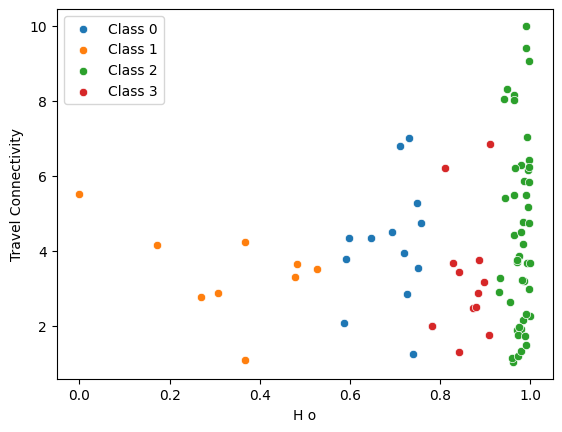

In [ ]:
sns.scatterplot(data=predicted_class_0, x='Η o', y='Travel Connectivity', label='Class 0')
sns.scatterplot(data=predicted_class_1, x='Η o', y='Travel Connectivity', label='Class 1')
sns.scatterplot(data=predicted_class_2, x='Η o', y='Travel Connectivity', label='Class 2')
sns.scatterplot(data=predicted_class_3, x='Η o', y='Travel Connectivity', label='Class 3')

plt.legend()
plt.show()

2. The purpose of visualizing 'φ' against 'Travel Connectivity' for each predicted class is to explore any potential relationships or patterns between the orientation parameter 'φ' and the level of travel connectivity across different urban areas, as segmented by the predicted classes.
>
φ : This seems to be an orientation-order indicator. It likely measures the degree of order or alignment of street segments within a given urban area. Higher values of φ may indicate more organized or aligned street layouts.

Insights
>

This graph indicates that higher the value of φ more structure/organised it that city.
In thi example we observe that Cities in Class 2 have most aligned / orgainzied street layouts, whereas the streets in cities in Class 1 have  most disordered alignment.
>
As in the article, it indicates the same thing, Chicago, the most ordered city, has a φ of 0.90, while Charlotte, the most disordered, has a φ of 0.002.

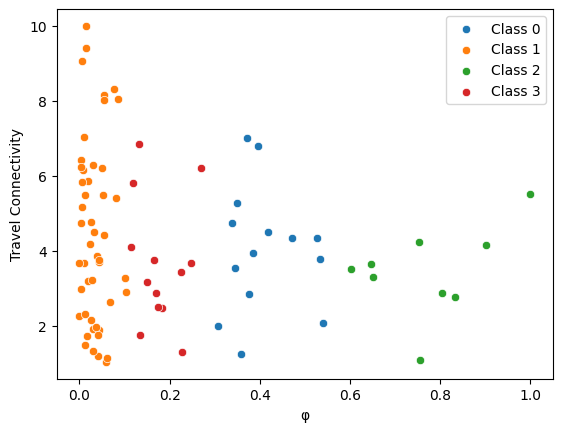

In [ ]:
sns.scatterplot(data=predicted_class_0, x='φ', y='Travel Connectivity', label='Class 0')
sns.scatterplot(data=predicted_class_1, x='φ', y='Travel Connectivity', label='Class 1')
sns.scatterplot(data=predicted_class_2, x='φ', y='Travel Connectivity', label='Class 2')
sns.scatterplot(data=predicted_class_3, x='φ', y='Travel Connectivity', label='Class 3')

plt.legend()
plt.show()

3. The scatter plots allow viewers to observe the relationship between outdoor spaces and travel connectivity within each predicted class. This analysis can provide insights into how urban areas with varying levels of outdoor amenities relate to their transportation infrastructure.

Insights
>
 Urban design elements such as interconnected pathways, and vibrant public squares can enhance connectivity while encouraging outdoor interaction and exploration.
 >
 In summary, travel connectivity and outdoor spaces are interconnected components of urban environments that influence how people navigate, interact with, and experience cities. Designing cities with well-connected outdoor spaces enhances accessibility, promotes sustainable transportation options, and contributes to overall urban livability and quality of life.
>
The Class 2 with most organised street layout has the highest value in Outdoors.

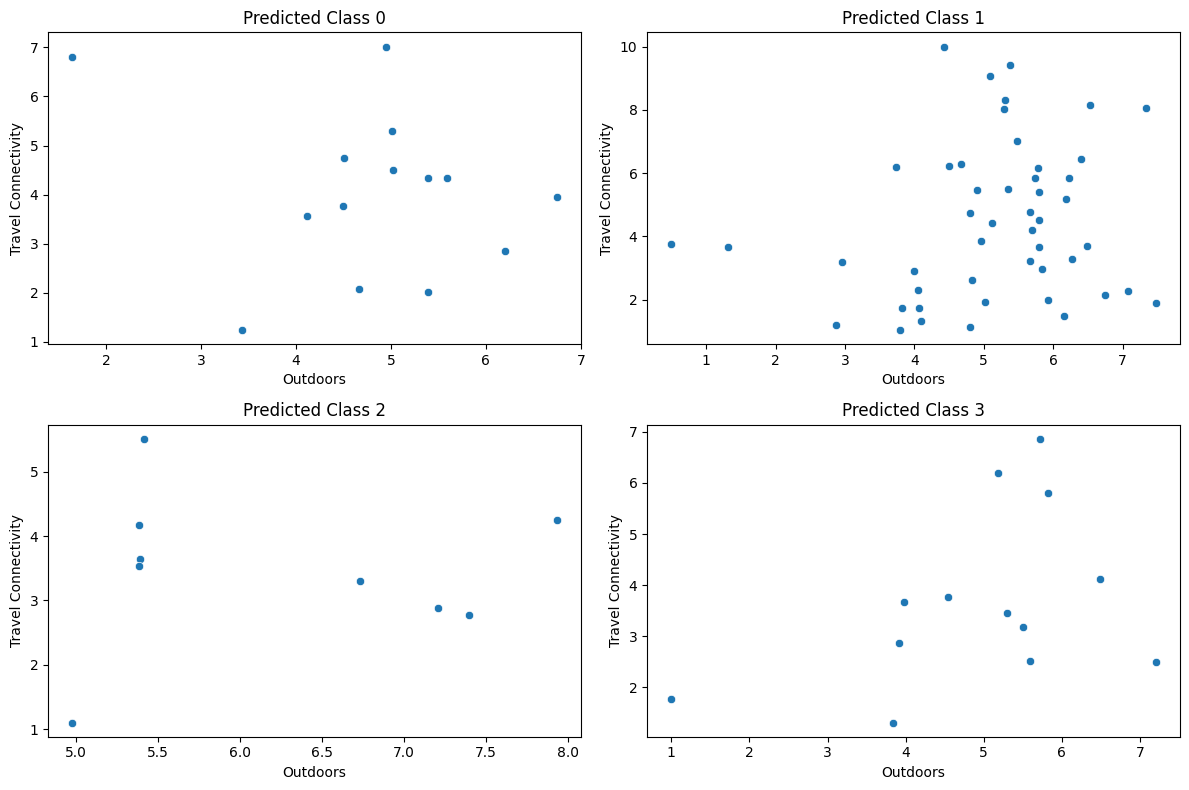

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms for each predicted class
sns.scatterplot(predicted_class_0,x='Outdoors',y='Travel Connectivity', ax=axes[0, 0])
sns.scatterplot(predicted_class_1,x='Outdoors',y='Travel Connectivity', ax=axes[0, 1])
sns.scatterplot(predicted_class_2,x='Outdoors',y='Travel Connectivity', ax=axes[1, 0])
sns.scatterplot(predicted_class_3,x='Outdoors',y='Travel Connectivity', ax=axes[1, 1])

# Set titles for subplots
axes[0, 0].set_title('Predicted Class 0')
axes[0, 1].set_title('Predicted Class 1')
axes[1, 0].set_title('Predicted Class 2')
axes[1, 1].set_title('Predicted Class 3')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###Bar Plot

Pde: This represents the proportion of nodes that are dead-ends. Dead-end nodes are those where only one street segment terminates, meaning there is no continuation of the network beyond that point.
>

1. This visualization can help identify any patterns, trends, or differences in "P de" values across different predicted classes, aiding in understanding the relationship between "P de" and the predicted classes.


Insights
>
Based on each Predicted class, Class 0 and class 1 have the least dead-end nodes and is found in nonly one region that is US/Canada, Asia etc whereas Class 1 and Class 3 have dead-end nodes disttributed among different regions.

According to the article,Buenos Aires and
Manhattan have the smallest proportions of dead-end nodes.

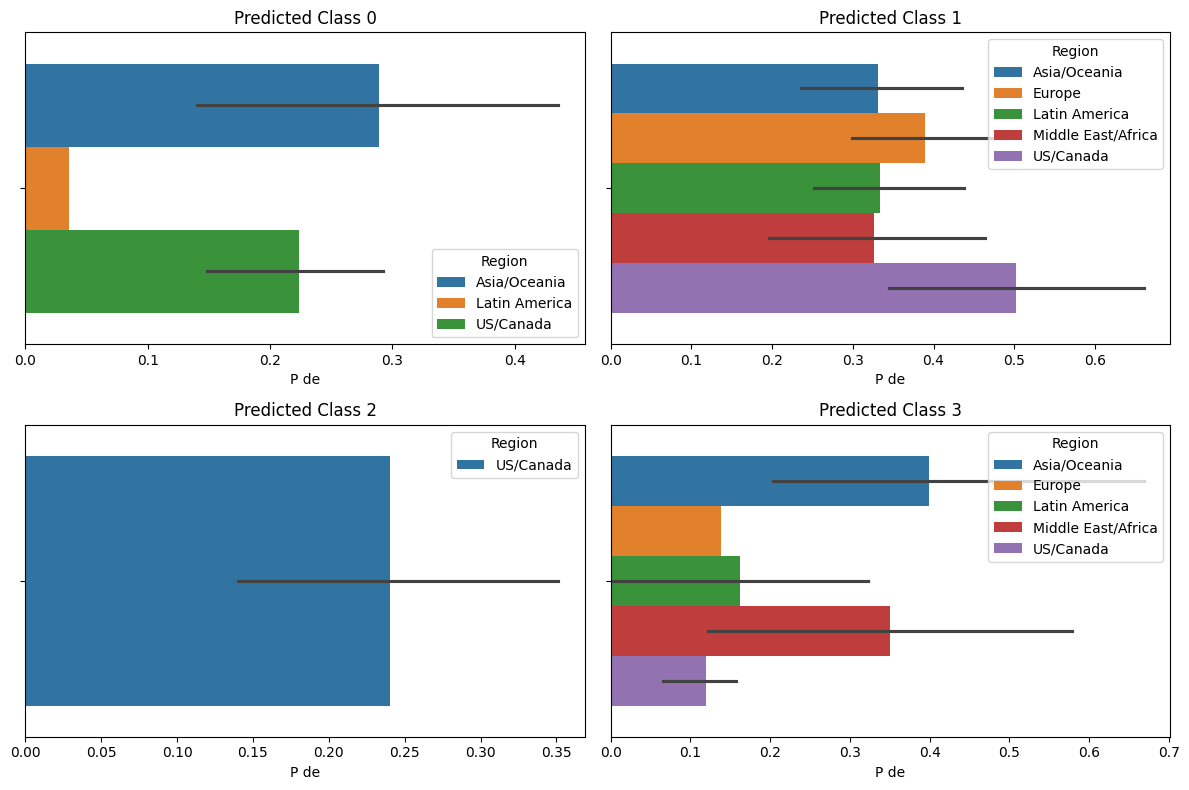

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot bar plots for each predicted class and region
sns.barplot(data=predicted_class_0, x='P de', hue='Region', ax=axes[0, 0])
sns.barplot(data=predicted_class_1, x='P de', hue='Region', ax=axes[0, 1])
sns.barplot(data=predicted_class_2, x='P de', hue='Region', ax=axes[1, 0])
sns.barplot(data=predicted_class_3, x='P de', hue='Region', ax=axes[1, 1])

# Set titles for subplots
axes[0, 0].set_title('Predicted Class 0')
axes[0, 1].set_title('Predicted Class 1')
axes[1, 0].set_title('Predicted Class 2')
axes[1, 1].set_title('Predicted Class 3')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

P4w: This represents the proportion of nodes that are four-way intersections. Four-way intersections are nodes where exactly four street segments meet.
>
2. By comparing the bar plots across the subplots, you can observe how the distribution of "P 4w" varies across different regions within each predicted class. This visualization helps to understand potential patterns or differences in the urban characteristics represented by "P 4w" among various regions within each predicted class.



Insights
>
Based on each Predicted class, Class 0 and class 2 have the least proportion of nodes that are four-way intersections and is found in only one region that is US/Canada, Asia etc whereas Class 0 and Class 2 have proportion of nodes that are four-way intersections disttributed among different regions.
According to the article, Buenos Aires and
Manhattan similarly have the largest proportions of four-way intersections which are present in class 1 and class 3.

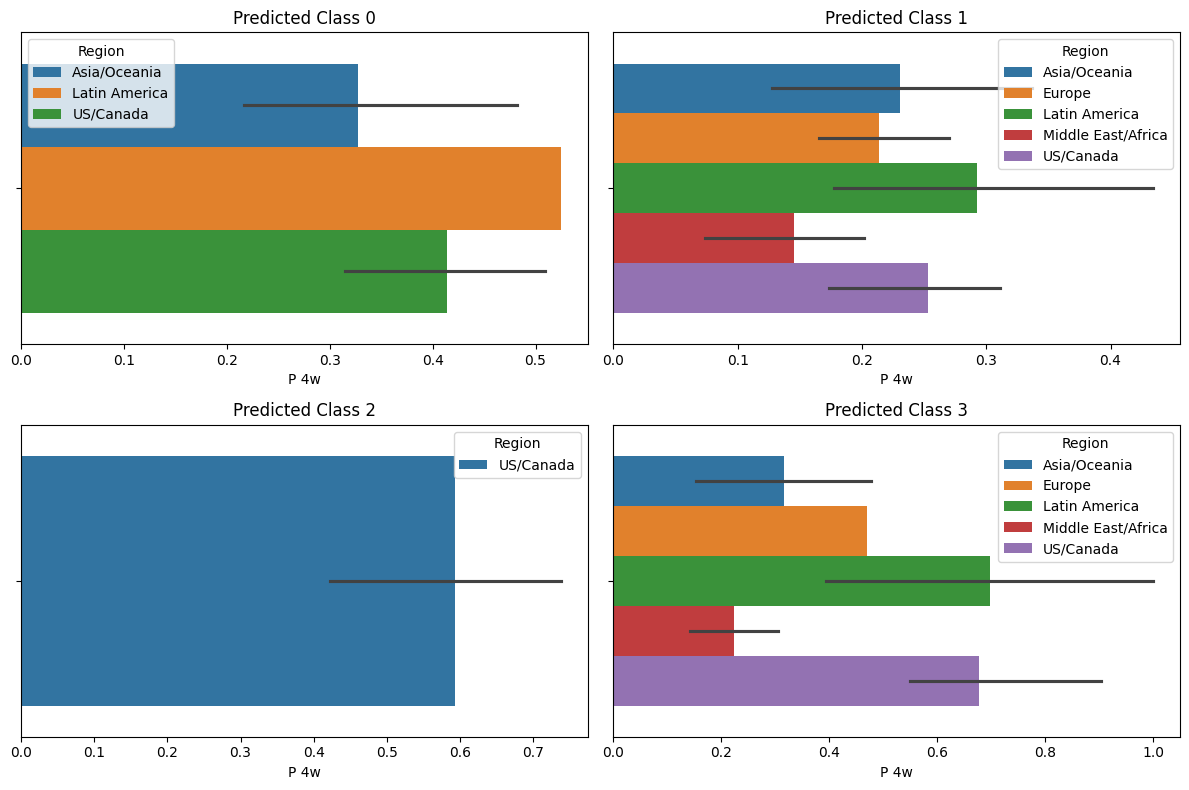

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot bar plots for each predicted class and region
sns.barplot(data=predicted_class_0, x='P 4w', hue='Region', ax=axes[0, 0])
sns.barplot(data=predicted_class_1, x='P 4w', hue='Region', ax=axes[0, 1])
sns.barplot(data=predicted_class_2, x='P 4w', hue='Region', ax=axes[1, 0])
sns.barplot(data=predicted_class_3, x='P 4w', hue='Region', ax=axes[1, 1])

# Set titles for subplots
axes[0, 0].set_title('Predicted Class 0')
axes[0, 1].set_title('Predicted Class 1')
axes[1, 0].set_title('Predicted Class 2')
axes[1, 1].set_title('Predicted Class 3')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

###Histogram and KDE

1. ĩ: This represents the median street segment length in meters. It gives an idea of the typical length of street segments within the urban area.

By comparing the histograms across the subplots, you can observe how the distribution of "ĩ" varies across different predicted classes. This visualization helps to understand the distribution and spread of the variable "ĩ" within each predicted class and identify any potential patterns or differences among them.


Insights:
>

Predicted class 3 has the shortest median of street segment lenghths suggesting to have fine grained networks, as in the the article Venice, Mogadishu, Helsinki, Jerusalem, and Casablanca have the shortest median
street segment lengths (indicating fine-grained networks) which in our case falls under Predicted class 3.

Similarly, Predicted class 1 has the longest
suggesting to have coasre-grained networks as in the the article Kiev, Moscow, Pyongyang,
Beijing, and Shanghai have the longest (indicating coarse-grained networks) which in our case falls under Predicted class 1





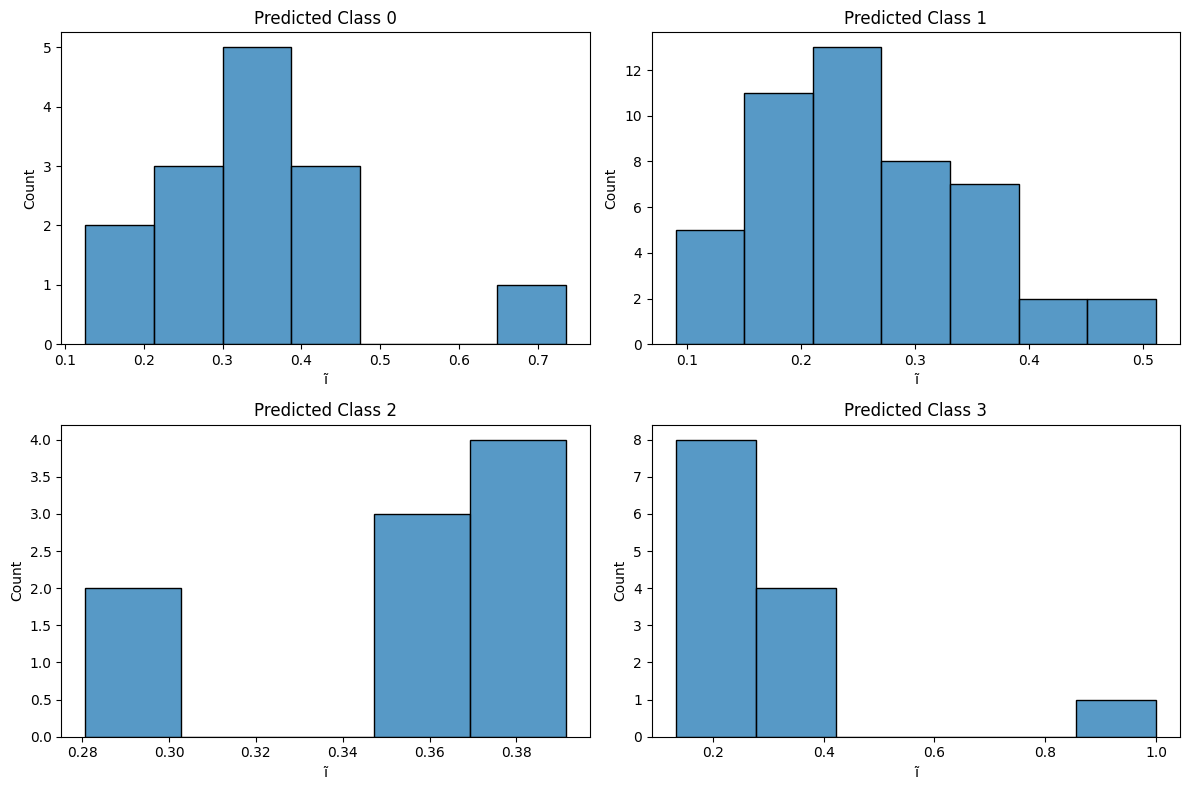

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms for each predicted class
sns.histplot(data=predicted_class_0, x='ĩ', ax=axes[0, 0])
sns.histplot(data=predicted_class_1, x='ĩ', ax=axes[0, 1])
sns.histplot(data=predicted_class_2, x='ĩ', ax=axes[1, 0])
sns.histplot(data=predicted_class_3, x='ĩ', ax=axes[1, 1])

# Set titles for subplots
axes[0, 0].set_title('Predicted Class 0')
axes[0, 1].set_title('Predicted Class 1')
axes[1, 0].set_title('Predicted Class 2')
axes[1, 1].set_title('Predicted Class 3')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


ς : This represents the average circuity. Circuity is a measure of the ratio of the actual length of a street to the straight-line distance between its endpoints. Average circuity provides insight into how much streets deviate from straight-line paths on average.


2.  the KDE plots provide insights into how the variable 'ς' is distributed within each predicted class and how this distribution varies across different regions.


Insights:
>
 lower ς -> least circuitous networks
>
 higher ς  - > most circuitous networks
>

Predicted Class 2 has least circuitous network, however Predictd Class 1 has  more circuitous network.

According to the article Buenos Aires, Detroit, and Chicago have the least circuitous networks (falls under Predicted class 2 ), while Caracas, Hong Kong,and Sarajevo have the most circuitous networks (falls under predicted class 1)



<ipython-input-96-f78ca96d57bd>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=predicted_class_0, x='ς', hue='Region', ax=axes[0, 0])
<ipython-input-96-f78ca96d57bd>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=predicted_class_3, x='ς', hue='Region', ax=axes[1, 1])


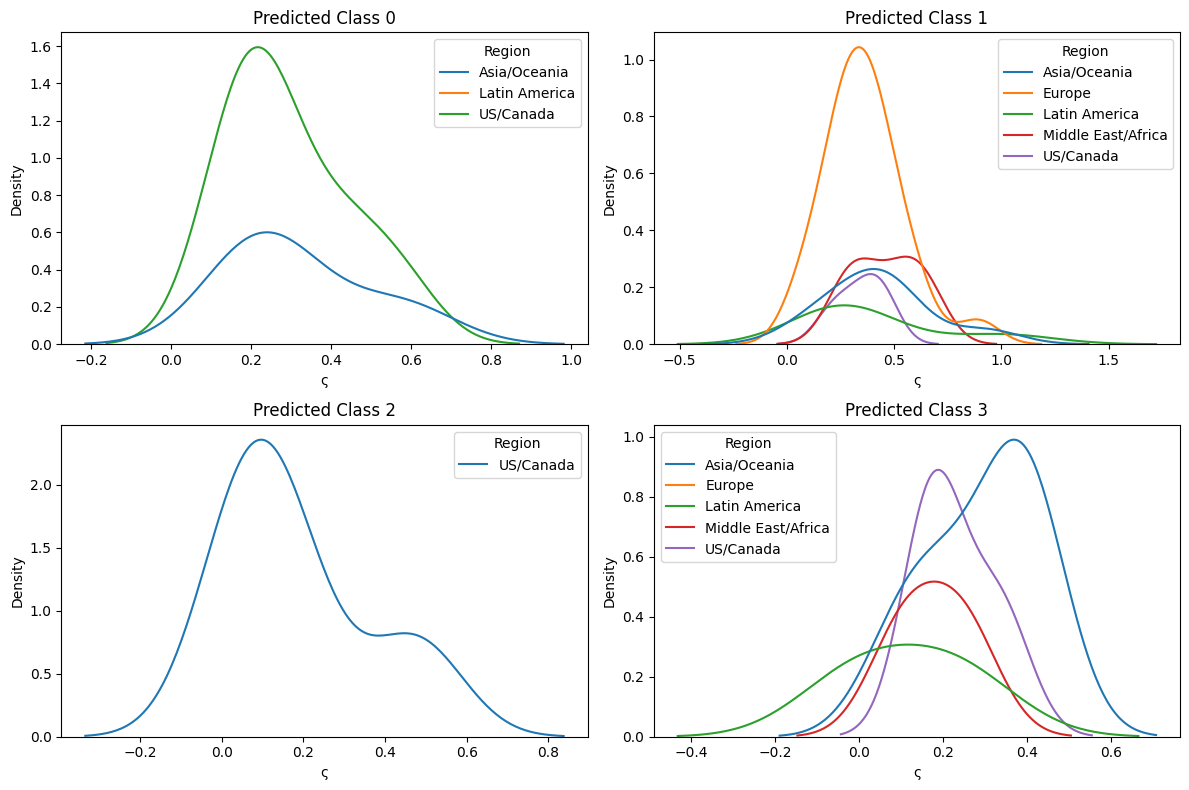

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot KDE plots for each predicted class and region
sns.kdeplot(data=predicted_class_0, x='ς', hue='Region', ax=axes[0, 0])
sns.kdeplot(data=predicted_class_1, x='ς', hue='Region', ax=axes[0, 1])
sns.kdeplot(data=predicted_class_2, x='ς', hue='Region', ax=axes[1, 0])
sns.kdeplot(data=predicted_class_3, x='ς', hue='Region', ax=axes[1, 1])

# Set titles for subplots
axes[0, 0].set_title('Predicted Class 0')
axes[0, 1].set_title('Predicted Class 1')
axes[1, 0].set_title('Predicted Class 2')
axes[1, 1].set_title('Predicted Class 3')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##Challenges Faced:
Understanding the data and intepreting it was bit difficult.
>
Data collection for adding extra attribute.
>

Merging of new attributes with respect to the original data
>

Re- running the code changed the data in the dataframe


##References:
1. https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0189-1/tables/1

2. https://www.openml.org/search?type=data&sort=runs&id=43827&status=active

3. https://www.kaggle.com/datasets/orhankaramancode/city-quality-of-life-dataset/data

4. https://medium.com/@iqra.bismi/different-linkage-methods-used-in-hierarchical-clustering-627bde3787e8#:~:text=There%20are%20several%20linkage%20methods,points%20in%20the%20two%20clusters